# <center>Project</center>  <center>Fall 2021</center> 


<br/><br/><br/>
**Title:**: Automated Liver and Tumor Segmentation
<br/><br/><br/><br/>

**Name**: MAHRUKH SALEEM

**Roll Number**: PHDCSF21M508



1. How Mask_RCNN works?


Answer: Mask RCNN is a deep learning model that is used to detect, segment and classify different objects in an image, it give three things as output i.e. object bounding box, class to which particular object belongs and mask. Firstly, it extracts features using any CNN which is the backbone network. Then  it identify proposed regions where object might exists which is the task of Region Proposed Network and the proposed regions are the feature volumes. Then it aligns all the feature volumes knows as ROI Align. After which classification and bounding box is predicted for objects as well as masks are generated using pixel level classification against object and background.

2. The data has been annotated using https://www.makesense.ai which is an  annotation tool. Annotated image has been shown below

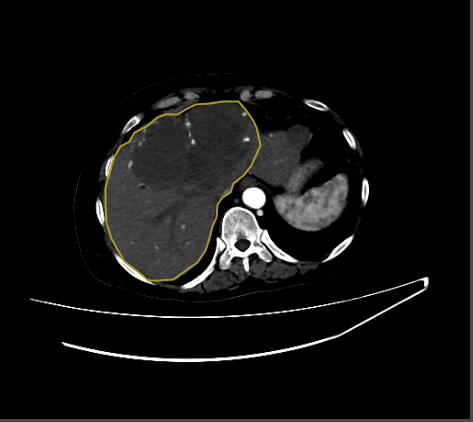

In [ ]:
import cv2
from mrcnn.visualize import random_colors, get_mask_contours, draw_mask
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/recitation8/annotatedsample.png')
image=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
cv2_imshow(image)

3. Implementation of Mask_RCNN 

**Dataset classes:**1

**Dataset size:**719

**Epochs**:5

**Batch_size:** 8 with 500 step size

**Loss:** loss: 0.143 - val_loss: 0.363


In [1]:
!nvidia-smi

Sun Mar 13 20:33:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    35W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
tf.version.VERSION


'1.15.2'

In [ ]:
!pip install --upgrade h5py==2.10.0

     |████████████████████████████████| 2.9 MB 5.4 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/project/")


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/project/

/content/drive/MyDrive/Colab Notebooks/project


In [ ]:
!ls

'PHDCSF21M508_MAHRUKH SALEEM_Project_liver_tumor.ipynb'   tumor_and_liver.json
 png.zip


In [ ]:
!git clone https://github.com/AdeelaIslam/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 1051, done.
remote: Total 1051 (delta 0), reused 0 (delta 0), pack-reused 1051
Receiving objects: 100% (1051/1051), 125.29 MiB | 12.87 MiB/s, done.
Resolving deltas: 100% (619/619), done.
Checking out files: 100% (78/78), done.


In [ ]:
sys.path.append("/content/drive/MyDrive/Colab Notebooks/project/Mask_RCNN/demo")

In [ ]:
from train_mask_rcnn_pro import *
%matplotlib inline

VERS 0.2


In [ ]:
images_path="png.zip"
annotations_path="tumor_and_liver.json"

extract_images(images_path,"/png")

Extracted: 719 images


In [ ]:
dataset_train=load_image_dataset(annotations_path,"/png","train")
dataset_val=load_image_dataset(annotations_path,"/png","val")
class_number=dataset_train.count_classes()
print('train:%d' % len(dataset_train.image_ids))
print('validation:%d' % len(dataset_val.image_ids))
print("Classes: {}",format(class_number))

Annotation json path:  tumor_and_liver.json
Annotation json path:  tumor_and_liver.json
train:639
validation:79
Classes: {} 2


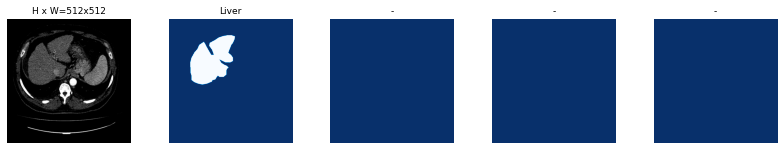

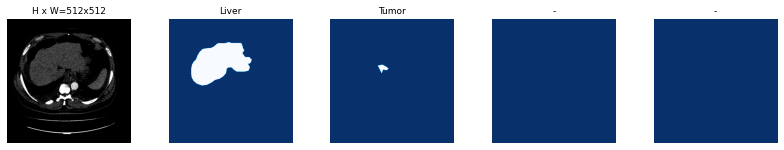

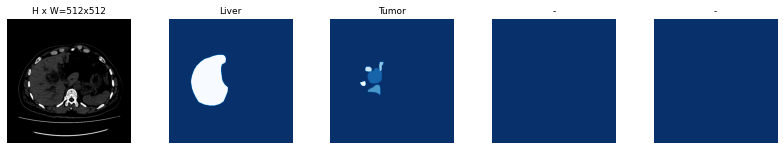

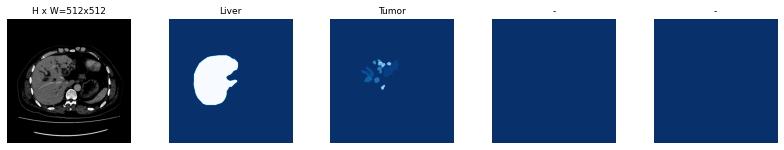

In [ ]:
display_image_samples(dataset_train)

In [ ]:
config=CustomConfig(class_number)
model=load_training_model(config, "liver and tumor")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
/content/drive/MyDrive/Colab Notebooks/project/Mask_RCNN/mask_rcnn_coco.h5


In [ ]:
train_head(model,dataset_train,dataset_val,config,5)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/gdrive/MyDrive/pysource_mrcnn_pro/liver and tumor/object20220308T0038/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4   

Results on testing images.

In [ ]:
from mrcnn.visualize import random_colors, get_mask_contours, draw_mask
from google.colab.patches import cv2_imshow

In [ ]:

img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/project/volume1d00323.dcm.png')
checkpoint_path='/content/drive/MyDrive/Colab Notebooks/project/Mask_RCNN/logs/object20220302T1831/mask_rcnn_object_0005.h5'
test_model,inference_config=load_inference_model(num_classes=1, model_path=checkpoint_path)
image=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
r=test_model.detect([image])[0]




Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/drive/MyDrive/Colab Notebooks/recitation8/Mask_RCNN/logs/object20220302T1831/mask_rcnn_object_0005.h5
Re-starting from epoch 5





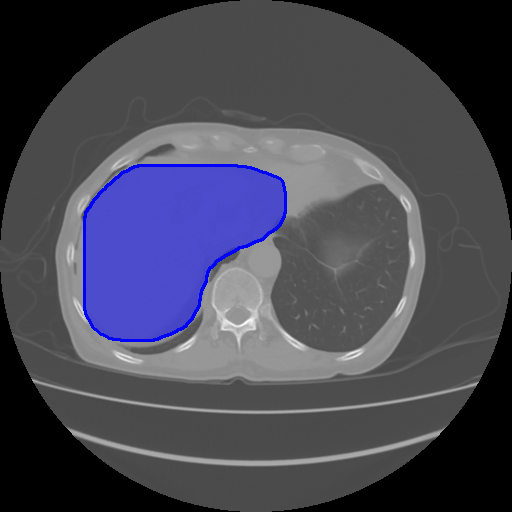

In [ ]:
object_count=len(r["class_ids"])
colors=random_colors(object_count)
for i in range (object_count):
  mask=r["masks"][:,:,i]
  contours=get_mask_contours(mask)
  for cnt in contours:
    cv2.polylines(img,[cnt],True,colors[i],2)
    img=draw_mask(img,[cnt],colors[i])
cv2_imshow(img)


In [ ]:
mask = r['masks']
mask = mask.astype(int)
mask.shape

(512, 512, 1)

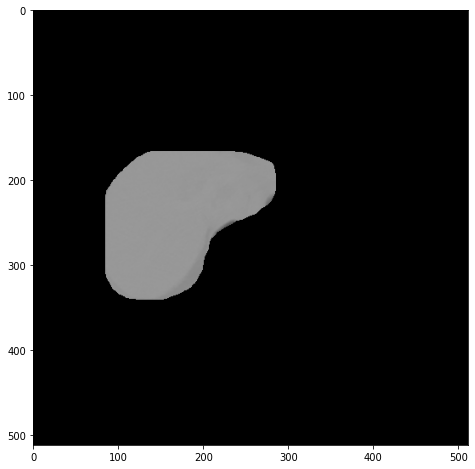

In [ ]:
for i in range(mask.shape[2]):
    temp=cv2.imread('/content/drive/MyDrive/Colab Notebooks/recitation8/img00015.png')
    for j in range(temp.shape[2]):
        temp[:,:,j] = temp[:,:,j] * mask[:,:,i]
    plt.figure(figsize=(8,8))
    plt.imshow(temp)

